In [1]:
import numpy as np
import tensorflow as tf # tf.keras.layers
from tensorflow import keras # keras.layers
from tensorflow.keras import layers # layers

### 단항분석

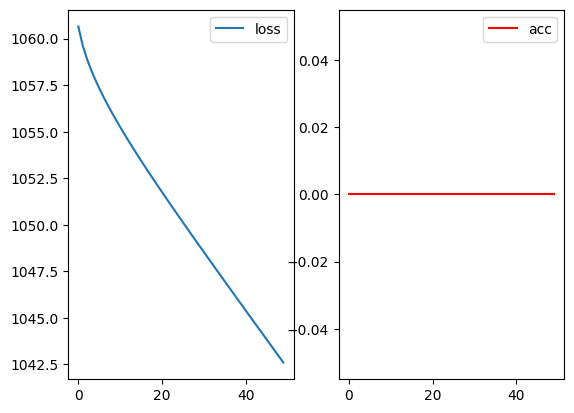

In [35]:
x = np.array([1,2,3,4,5,6])
y = np.array([10,20,30,40,50,60])

tf.random.set_seed(0)

# (2,)
# x = np.array([[1,2],[3,4],[5,6]])
'''
    지역 만족도
    1   2
    3   4
    5   6
'''

# (1,) dense의 가장 상단으로 입력되는 x 변수의 갯수(독립변수, 특징값 갯수)
input_layer = tf.keras.layers.InputLayer(input_shape=(1,)) # layers.InputLayer() 가능
output_layer = tf.keras.layers.Dense(units=1) # activation이 없으면 wx+b로 동작(선형회귀)

# 순차처리구조 (함수처리 가능)
model = keras.Sequential([
 input_layer,
 output_layer
])

# model.fit 할 때, 오차역전파하는 방법론 (최적화 함수 -> optimizer)
# model.fit 할 때, 구축된 모델에서 계산된 값(yhat), 실제 y값과 비교하는 공식(loss: 오차)
# model.fit 할 때, 화면에 출력될 사항 선택(metric)
model.compile(loss='mse', metrics=['acc']) # 모델 번역(오차 계산, 지표는 정확도)
hist = model.fit(x, y, epochs=50, verbose=0) # 중간의 weight 값을 알 수 없기에 세이브를 해야 함
list(hist.history) # metrics에 'acc'을 추가 했음

import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label='loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(hist.history['acc'], 'r', label='acc')
plt.legend(loc='upper right')


In [17]:
model.predict(x)

1/1 [==============================] - 0s 31ms/step


array([[-0.7393924],
       [-1.5378581],
       [-2.3363237],
       [-3.1347895],
       [-3.9332552],
       [-4.7317204]], dtype=float32)

In [18]:
# model.summary()
# 사이킷런은 w, b가 고정
model.get_weights() # w, b

[array([[-0.79846567]], dtype=float32), array([0.05907325], dtype=float32)]

In [ ]:
import numpy as np
import tensorflow as tf # tf.keras.layers
from tensorflow import keras # keras.layers
from tensorflow.keras import layers # layers

In [38]:
x = np.array([1,2,3,4,5,6])
y = np.array([10,20,30,40,50,60])
tf.random.set_seed(1234)  

input_layer = tf.keras.layers.InputLayer(input_shape=(1,))
hidden_layer1 = tf.keras.layers.Dense(units=4, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(units=2, activation='relu')
output_layer= tf.keras.layers.Dense(units=1)  
# activation이 없으면 활성화함수 wx+b가 되어있는 것임.
model = keras.Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    output_layer
])

model.compile(#optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
print(model.fit(x, y))
print(model.predict(x))
print(model.evaluate(x,y))


1/1 [==============================] - 0s 43ms/step
[[ 0.00073443]
 [-0.00580785]
 [-0.01235014]
 [-0.01889242]
 [-0.02543471]
 [-0.031977  ]]
1/1 [==============================] - 0s 64ms/step - loss: 1518.1422 - accuracy: 0.0000e+00
[1518.1422119140625, 0.0]


In [41]:
model.get_weights()

[array([[-0.28764218, -0.35261613, -0.97262526,  0.5678445 ]],
       dtype=float32),
 array([ 0.        ,  0.        ,  0.        , -0.00316228], dtype=float32),
 array([[-0.6635401 ,  0.77674556],
        [ 0.7169466 , -0.8954325 ],
        [-0.27586365, -0.3388183 ],
        [-0.37374473,  0.00893413]], dtype=float32),
 array([ 0.        , -0.00316228], dtype=float32),
 array([[-0.7793279],
        [-1.289579 ]], dtype=float32),
 array([0.00316228], dtype=float32)]

In [40]:
intermdiate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
intermdiate_layer_model(x)

<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.56468225],
       [0.        , 0.        , 0.        , 1.1325268 ],
       [0.        , 0.        , 0.        , 1.7003713 ],
       [0.        , 0.        , 0.        , 2.2682157 ],
       [0.        , 0.        , 0.        , 2.83606   ],
       [0.        , 0.        , 0.        , 3.4039047 ]], dtype=float32)>

In [50]:
나이 = [ 20, 22, 24, 26, 28, 30]
성별 = [ 1, 0, 1, 0, 1, 0]
성적 = [ 20, 100, 70, 10, 20, 30]

import pandas as pd
df = pd.DataFrame({'나이': 나이, '성별': 성별, '성적': 성적})
x = df[['나이', '성별']].values
y = df[['성적']].values
display(df)


,나이,성별,성적
0,20,1,20
1,22,0,100
2,24,1,70
3,26,0,10
4,28,1,20
5,30,0,30


In [54]:
# 덴스 하나

w = [[1],   # 나이값의 웨이트
     [5]]   # 성별의 웨이트
w2 = [[1,5]]
np.shape(w), np.shape(w2)

np.dot(x,w)
'''
    20*1 + 1*5 = 25
    22*1 + 0*5 = 22
    .
    .
    .
'''


array([[25],
       [22],
       [29],
       [26],
       [33],
       [30]], dtype=int64)

In [ ]:
# 덴스 셋

w = [[1,2,3],   # 나이값의 웨이트
     [5,3,8]]   # 성별의 웨이트
b = [0,1,2]

